# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
from pathlib import Path

In [3]:
import seaborn as sns

In [4]:
from scipy.stats import spearmanr

In [5]:
data_store_path=Path("../Prepared_Data_Store")

# Importing Data

In [6]:
stock_data=pd.read_csv(os.path.join(data_store_path,"stocks_data.csv"),parse_dates=["date"],index_col=["date","ticker"])
factor_data=pd.read_csv(os.path.join(data_store_path,"factor_data.csv"),parse_dates=["date"],index_col=["date"])
sp500_data=pd.read_csv(os.path.join(data_store_path,"sp500_data.csv"),parse_dates=["date"],index_col=["date"])

# Data Visulaization

## Stocks Data Visualization

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 732292 entries, (Timestamp('2010-02-22 00:00:00'), 'A') to (Timestamp('2017-11-29 00:00:00'), 'ZBRA')
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   open                 732292 non-null  float64
 1   high                 732292 non-null  float64
 2   low                  732292 non-null  float64
 3   close                732292 non-null  float64
 4   volume               732292 non-null  float64
 5   dollar_volume        732292 non-null  float64
 6   dollar_volume_7d     732292 non-null  float64
 7   dollar_volume_15d    732292 non-null  float64
 8   dollar_volume_21d    732292 non-null  float64
 9   dollar_volume_rank   732292 non-null  float64
 10  returns_1d           732292 non-null  float64
 11  returns_7d           732292 non-null  float64
 12  returns_15d          732292 non-null  float64
 13  returns_21d          732292 non-null  float64

In [8]:
num_stock_to_plot=7
stock=np.random.choice(list(stock_data.index.get_level_values("ticker")),num_stock_to_plot)

In [9]:
stock

array(['ORLY', 'MHK', 'DXCM', 'SHW', 'CMS', 'ITW', 'CDNS'], dtype='<U5')

### Close Price Visualization

In [10]:
data=stock_data.close.unstack("ticker")

<Axes: xlabel='date'>

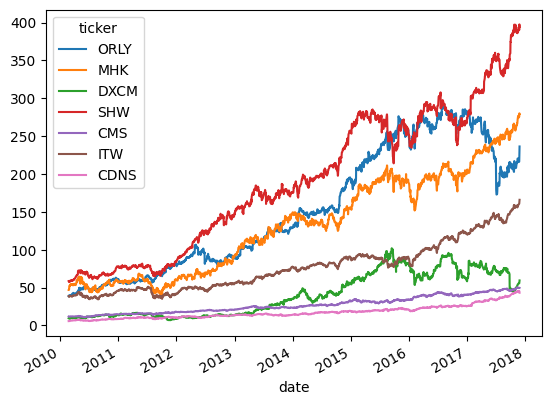

In [11]:
data[stock].plot()

### Momentum Visualization

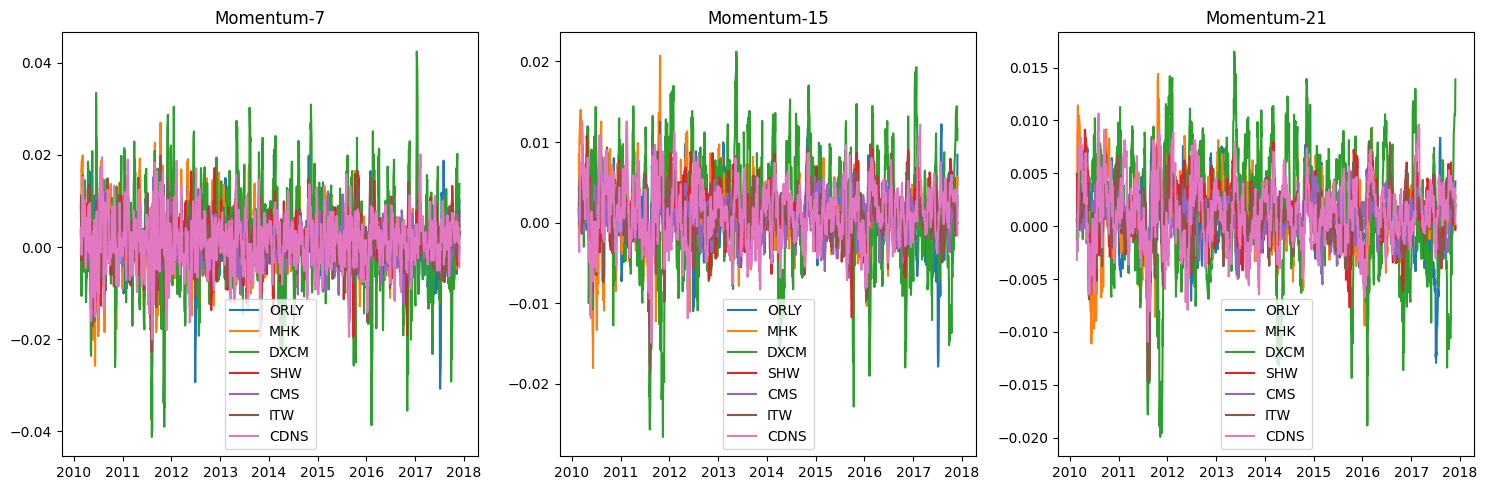

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for ind,t in enumerate([7,15,21]):
    data=stock_data[f"momentum_{t}d"].unstack("ticker")[stock]
    ax[ind].plot(data,label=data.columns)
    ax[ind].legend()
    ax[ind].set_title(f"Momentum-{t}")
    
plt.tight_layout()
plt.show()

### Volatility Visualization

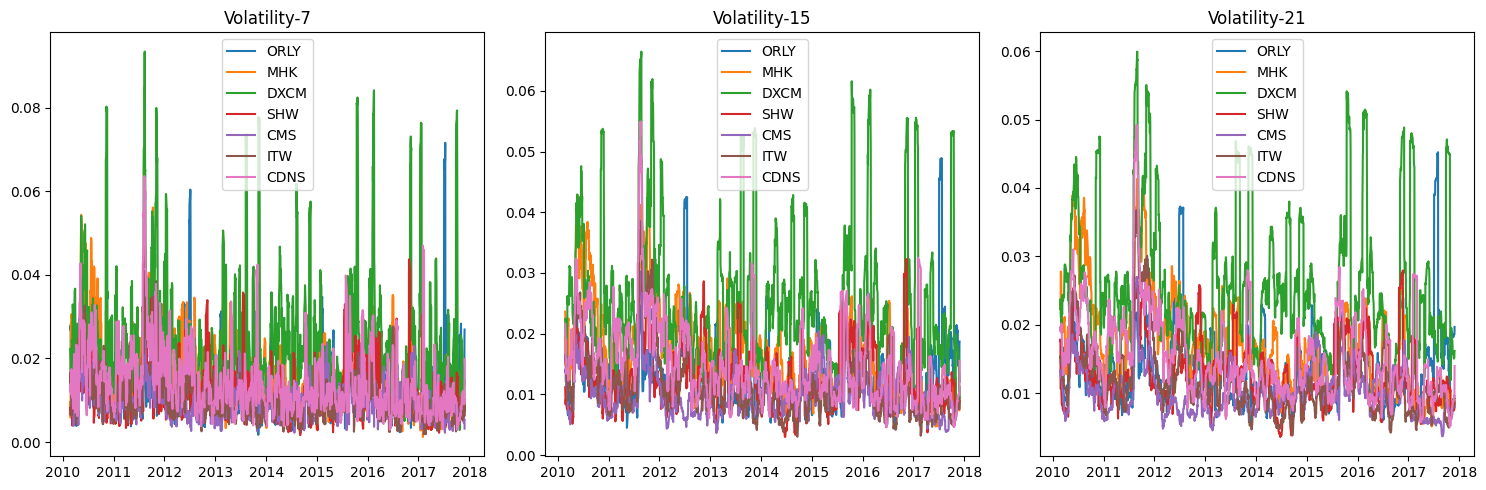

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for ind,t in enumerate([7,15,21]):
    data=stock_data[f"volatility_{t}d"].unstack("ticker")[stock]
    ax[ind].plot(data,label=data.columns)
    ax[ind].legend()
    ax[ind].set_title(f"Volatility-{t}")
    
plt.tight_layout()
plt.show()

### Various Price Visualizations of Stocks

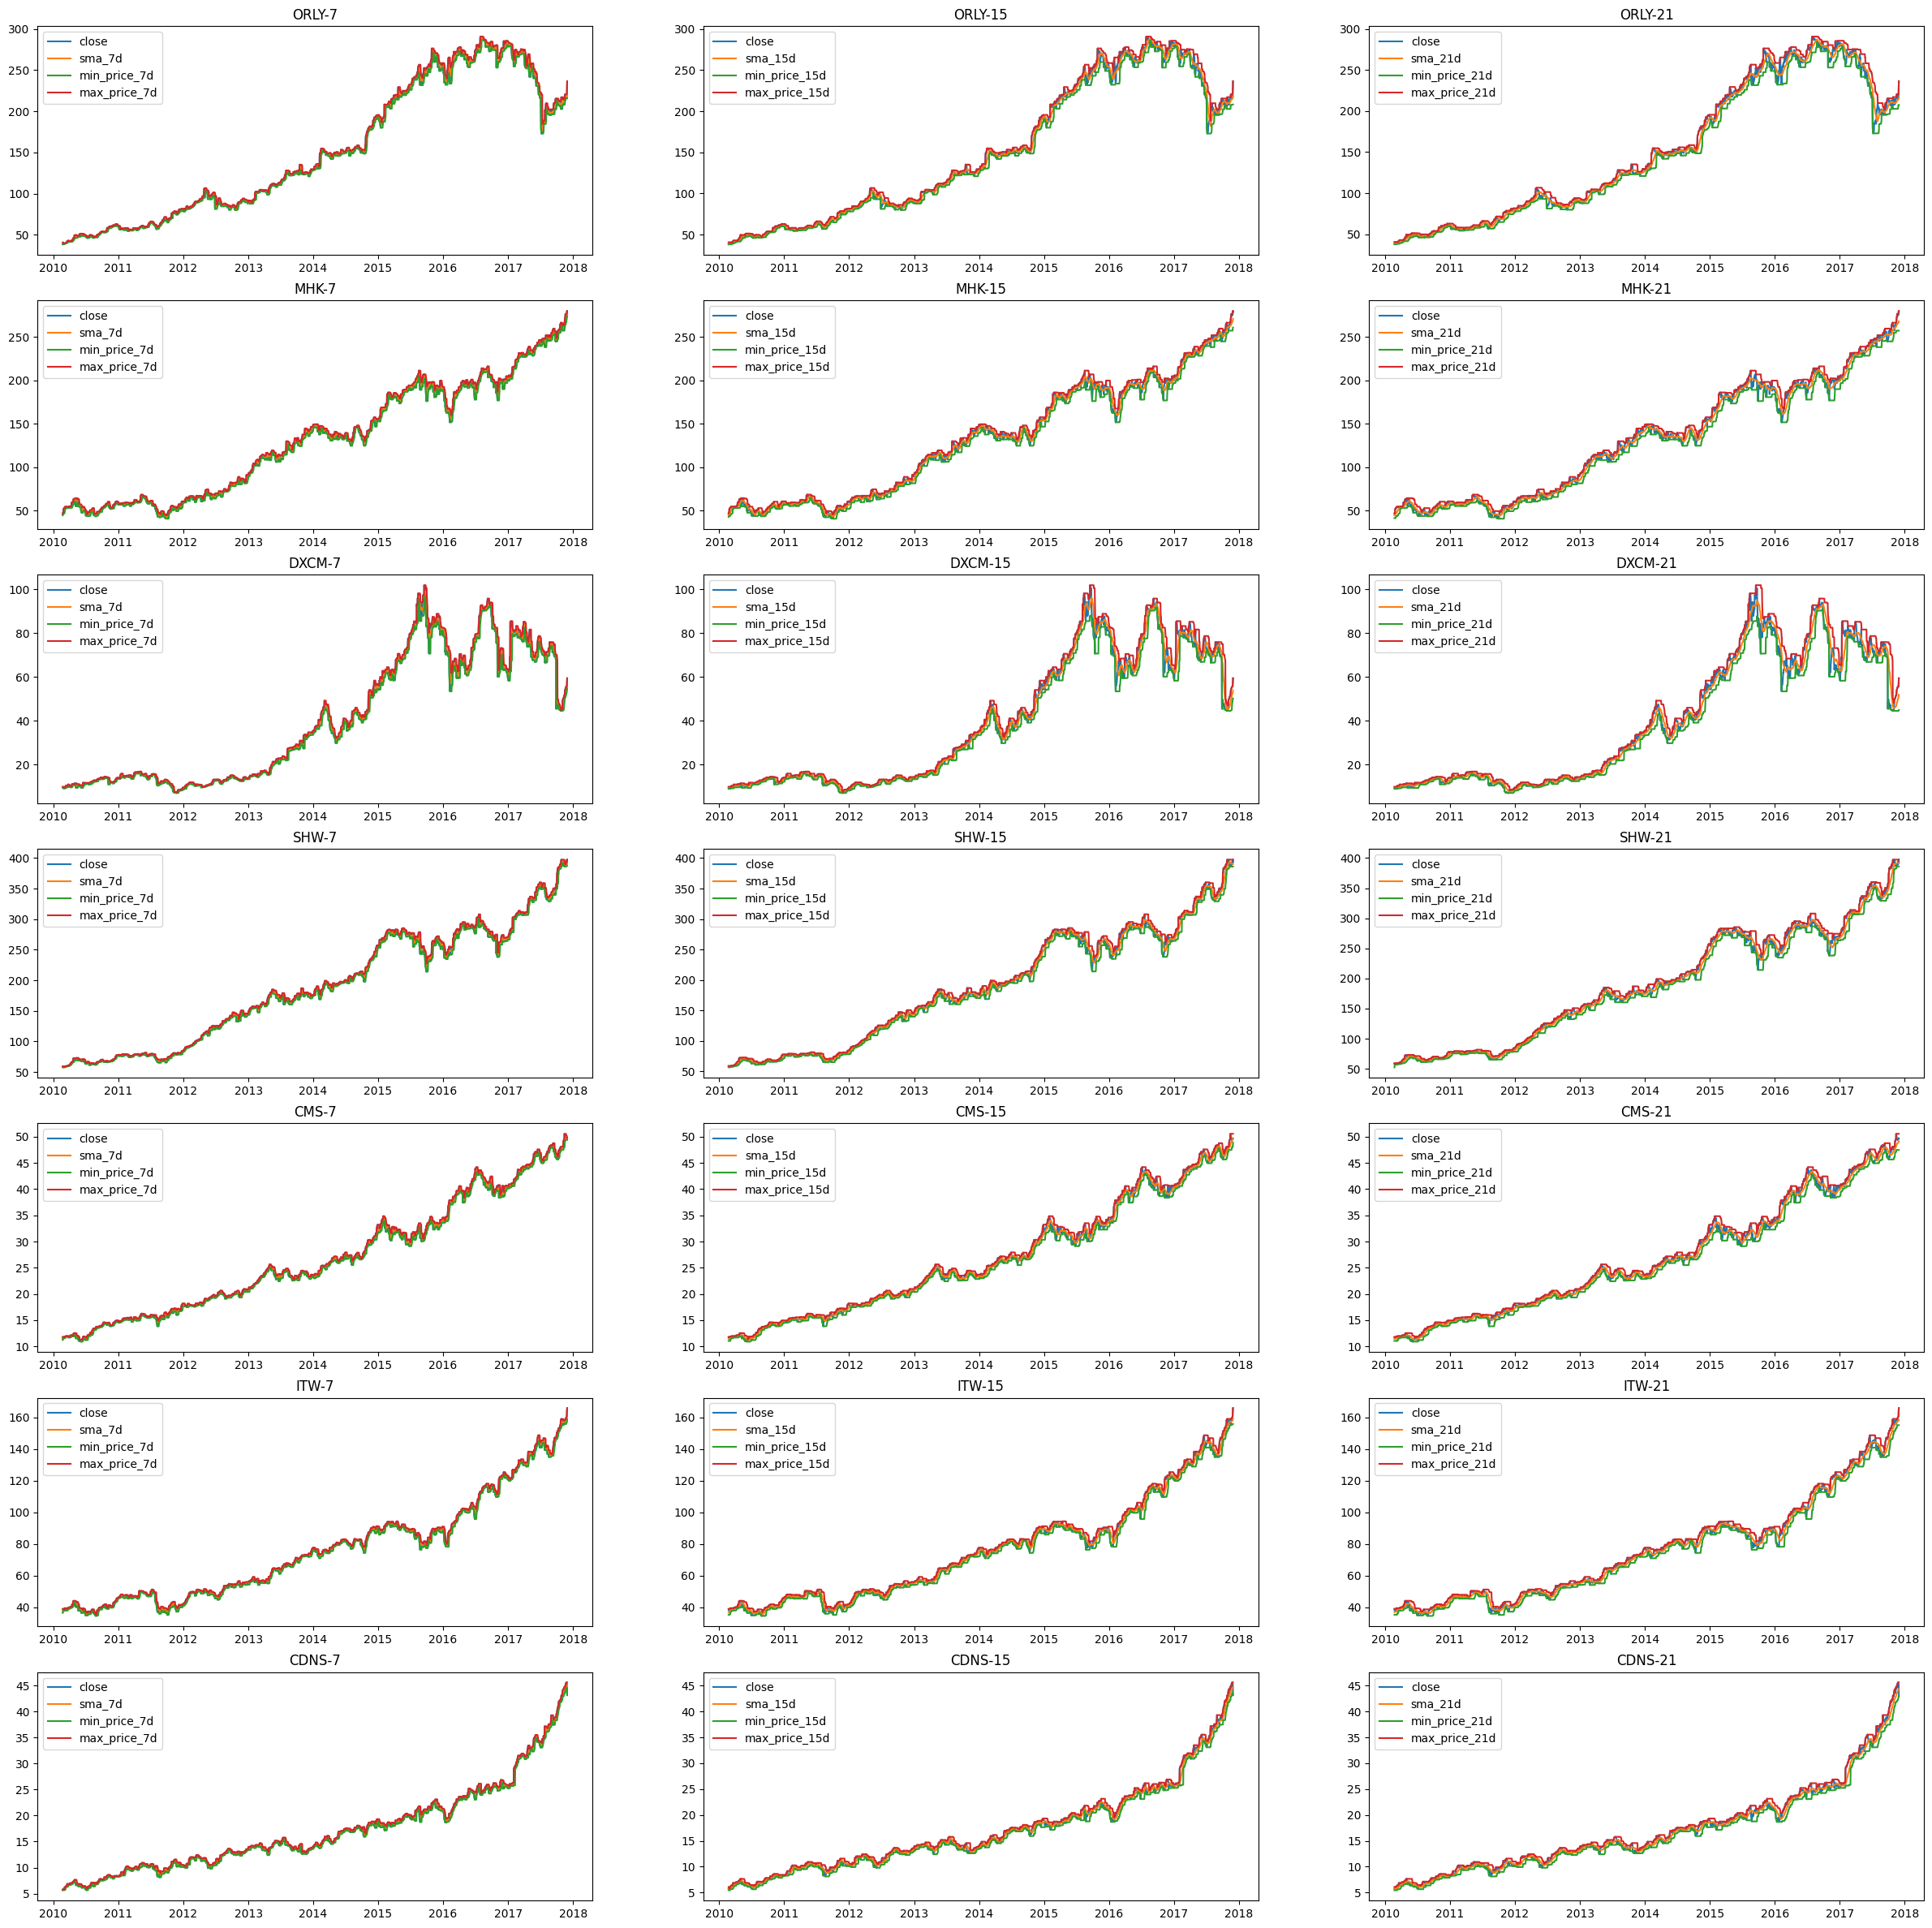

In [14]:
fig,ax=plt.subplots(nrows=len(stock),ncols=3,figsize=(30,30))
for ind1,stk in enumerate(stock):
    for ind2,t in enumerate([7,15,21]):
        data=stock_data.swaplevel().loc[stk][['close',f'sma_{t}d',f'min_price_{t}d',f'max_price_{t}d']]
        ax[ind1,ind2].plot(data,label=data.columns)
        ax[ind1,ind2].legend()
        ax[ind1,ind2].set_title(f"{stk}-{t}")

plt.show()
    

### RSI Visualization

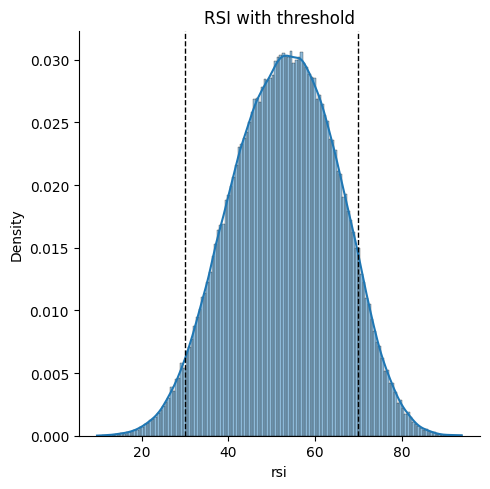

In [15]:
g=sns.displot(stock_data.rsi[stock_data.dollar_volume_rank<100],kde=True,stat="density")
ax=g.ax
ax.axvline(30,lw=1,ls="--",c="k")
ax.axvline(70,lw=1,ls="--",c="k")
ax.set_title("RSI with threshold")
plt.tight_layout()

### Bollinger Bonds Visualization

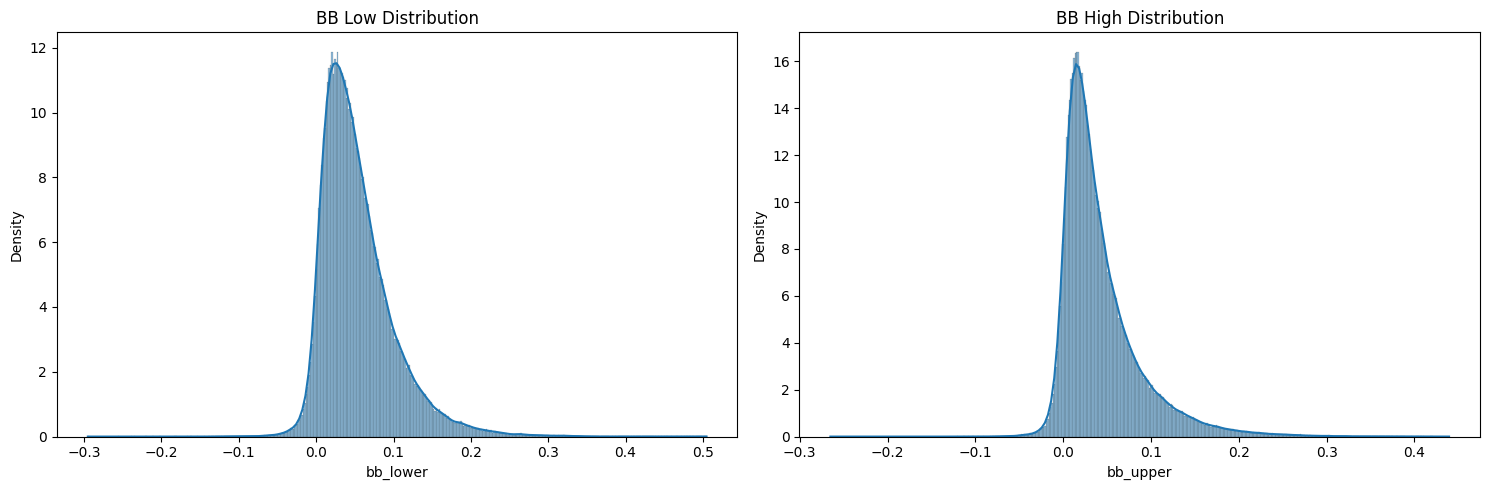

In [16]:
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.histplot(stock_data.bb_lower[stock_data.dollar_volume_rank<100],kde=True,stat="density",ax=axes[0])
sns.histplot(stock_data.bb_upper[stock_data.dollar_volume_rank<100],kde=True,stat="density",ax=axes[1])
axes[0].set_title("BB Low Distribution")
axes[1].set_title("BB High Distribution")
plt.tight_layout()

### Average True Range Visulaization

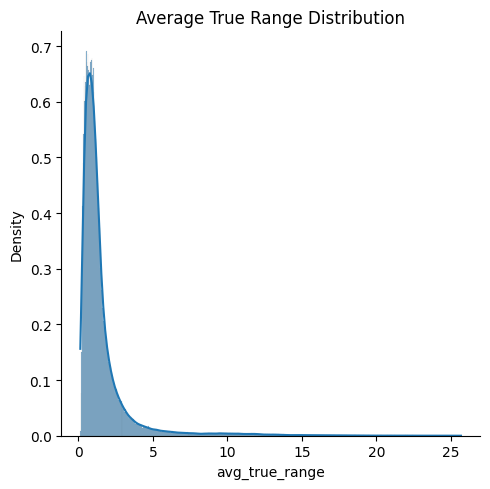

In [17]:
g=sns.displot(stock_data.avg_true_range[stock_data.dollar_volume_rank<100],kde=True,stat="density")
ax=g.ax
ax.set_title("Average True Range Distribution")
plt.tight_layout()


### MACD Visulaization

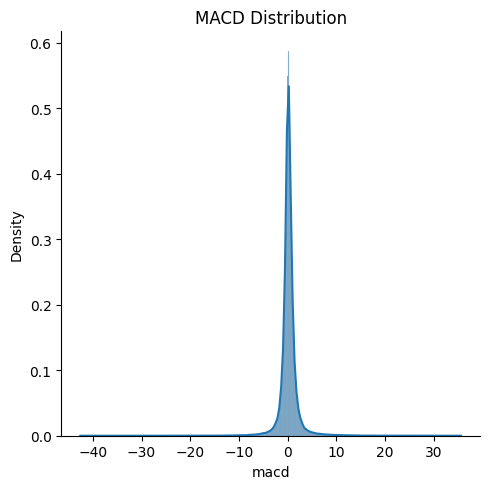

In [18]:
g=sns.displot(stock_data.macd[stock_data.dollar_volume_rank<100],kde=True,stat="density")
ax=g.ax
ax.set_title("MACD Distribution")
plt.tight_layout()

## Factor Data Visualization

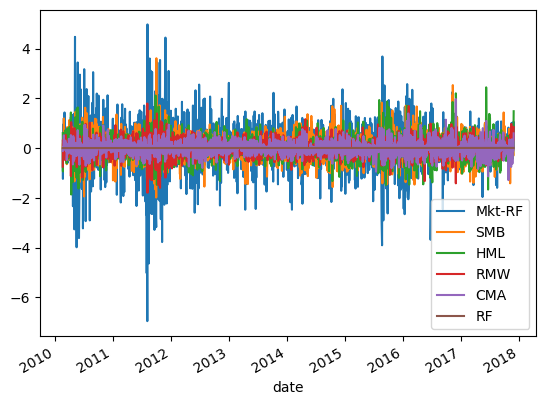

In [19]:
factor_data.plot()
plt.show()

## Sp500 Data Visualization

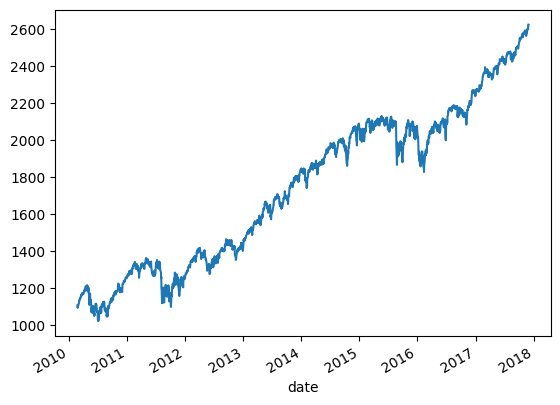

In [20]:
sp500_data["sp500_close"].plot()
plt.show()

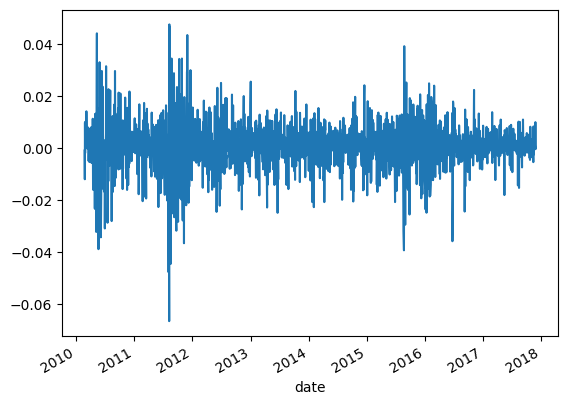

In [21]:
sp500_data["sp500_returns"].plot()
plt.show()

## Visualization of IC(Per Day) between Target Variables and Features

In [67]:
top100_data=stock_data[stock_data.dollar_volume_rank<100].groupby("date")


In [74]:
def plot_ic_per_day(features):
    fig,ax=plt.subplots(nrows=5,ncols=len(features),figsize=(30,25))
    for ind1,t in enumerate([1,5,7,15,21]):
        for ind2,feat in enumerate(features):
            data=top100_data.apply(lambda x: spearmanr(x[feat],x[f"forward_returns_{t}d"])[0])
            ic_mean=np.mean(data)
            ax[ind1,ind2].plot(data)
            ax[ind1,ind2].axhline(ic_mean,lw=1,ls="--",c="r",label="ic_mean")
            ax[ind1,ind2].set_title(f"IC between {feat} and {f'forward_returns_{t}d'}")
            ax[ind1,ind2].legend()
            

    plt.tight_layout()
    plt.show()
        

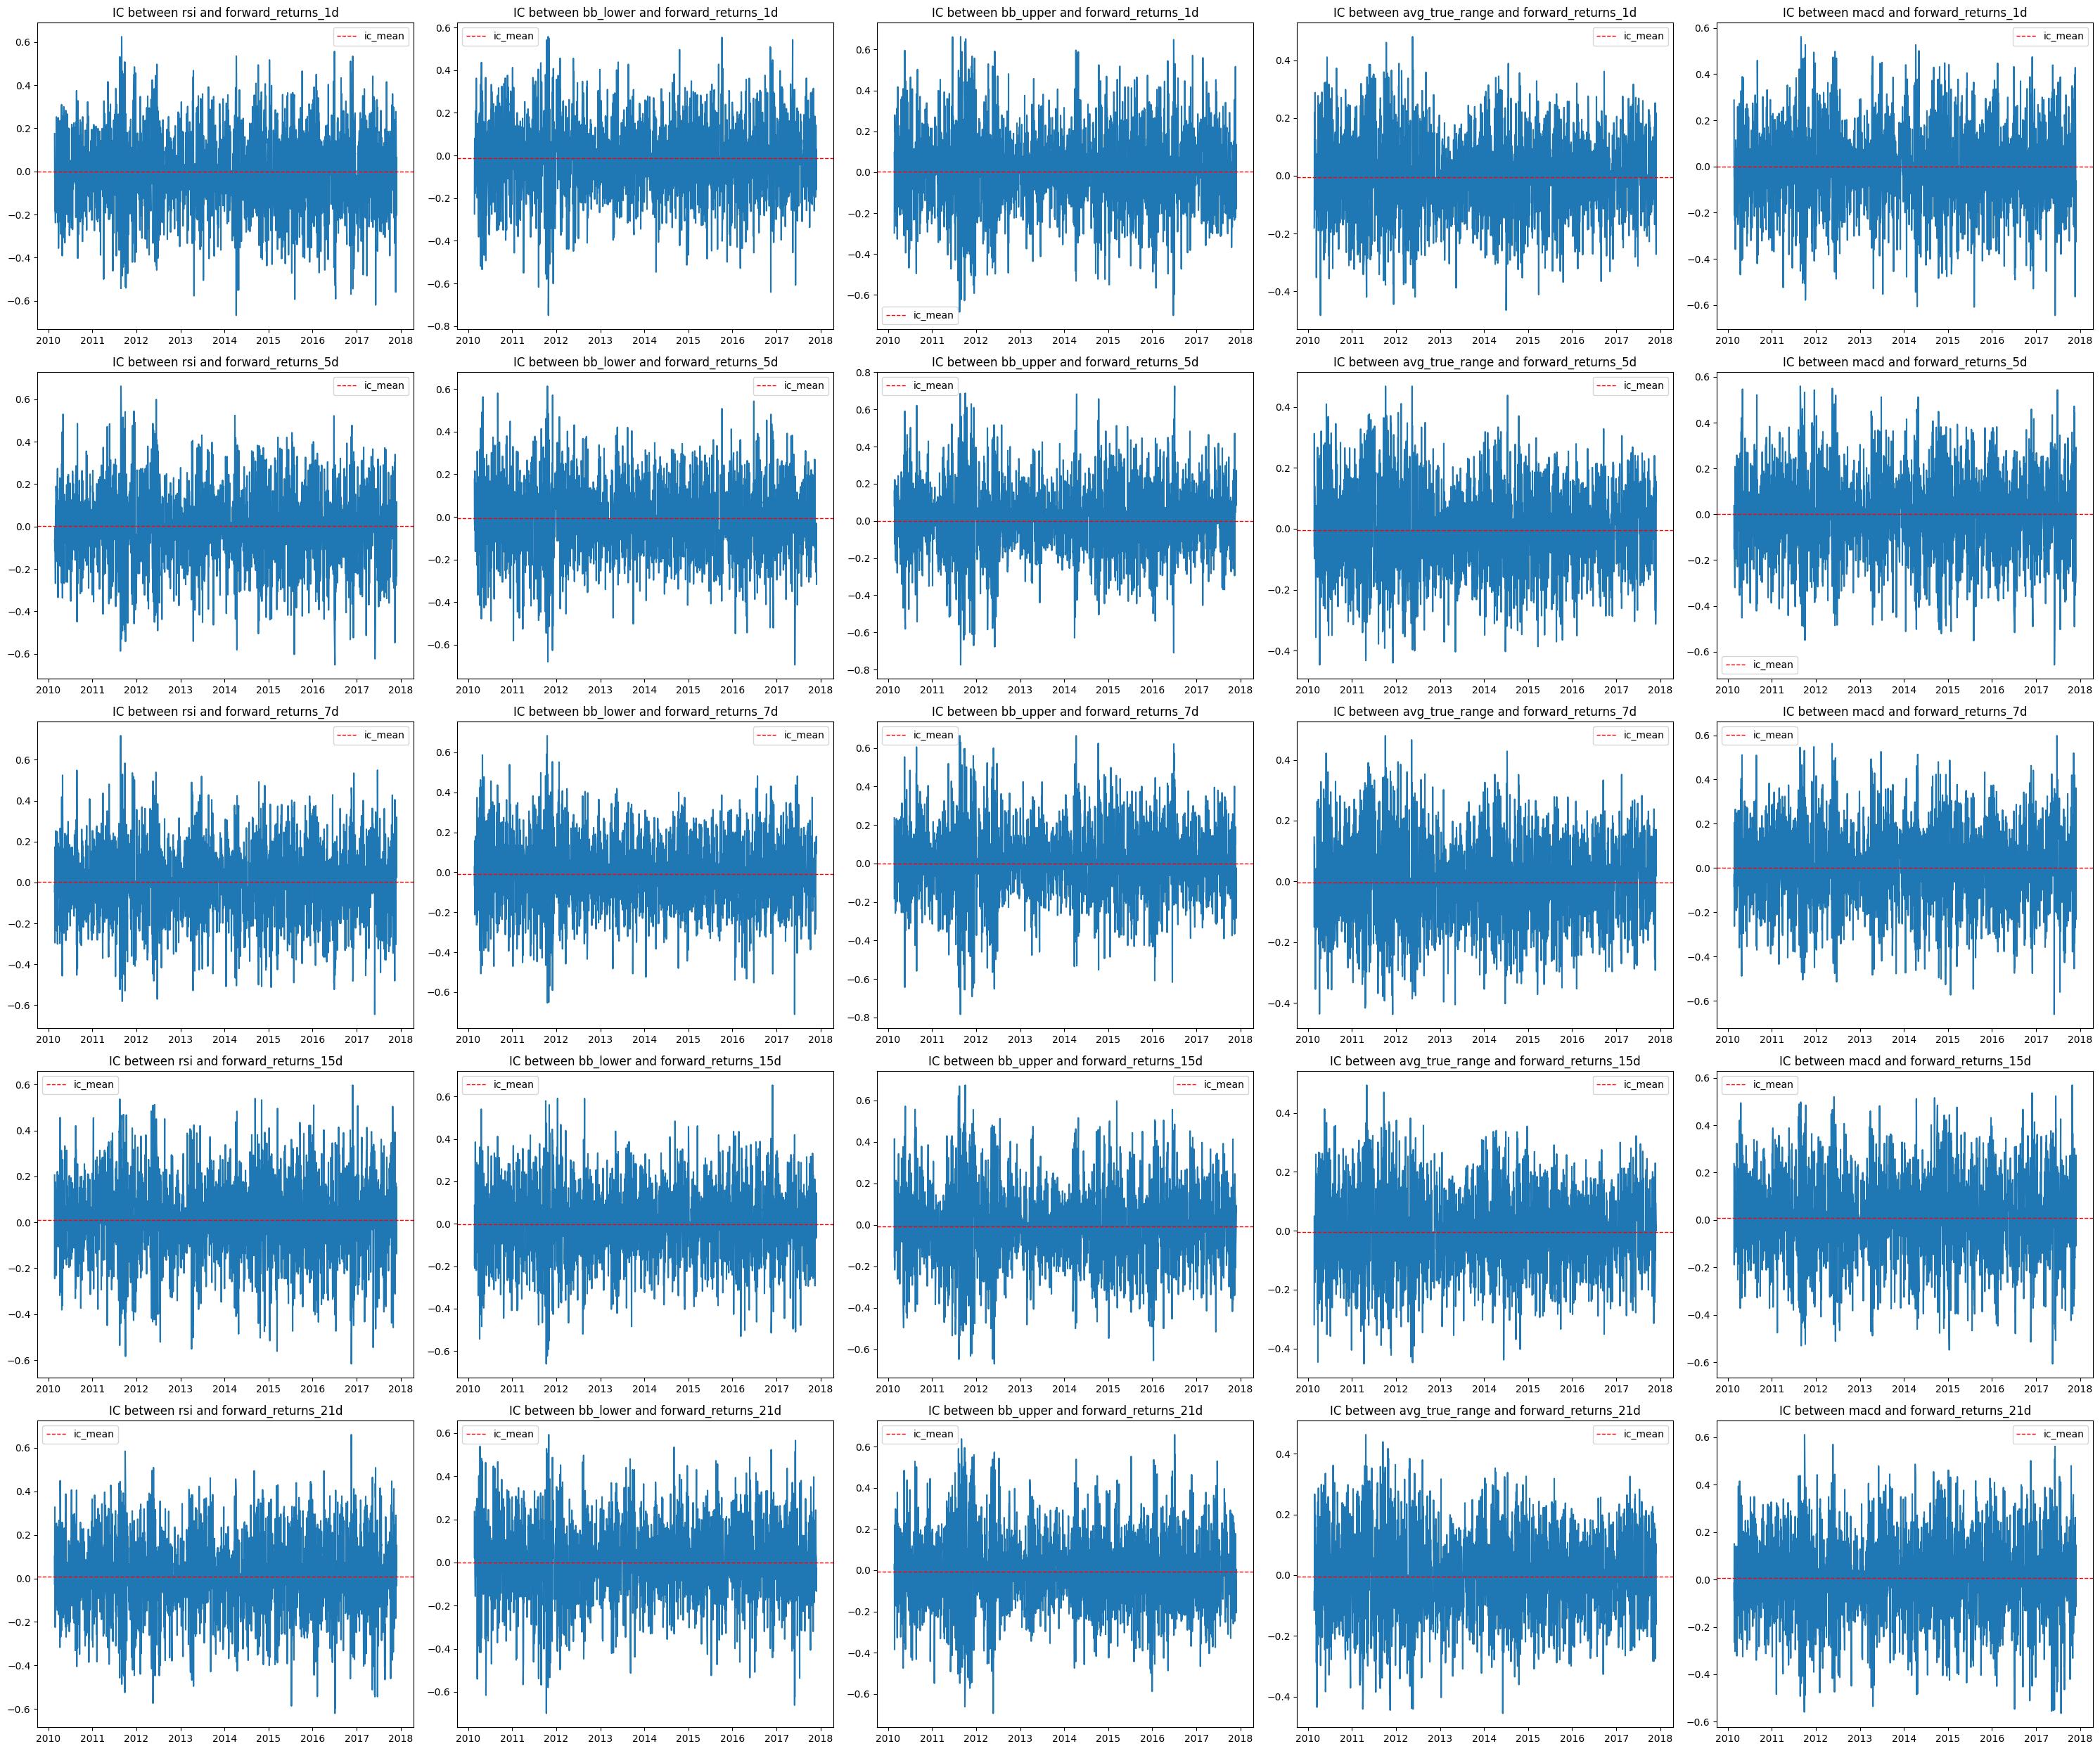

In [75]:
plot_ic_per_day(features=["rsi","bb_lower","bb_upper","avg_true_range","macd"])

## Visualization between Target Variables and Technical Indicator Features

In [62]:
top100_data=stock_data[stock_data.dollar_volume_rank<100]

In [31]:
def relation_between_feature_and_target(feature):
    for t in [1,7,15,21]:
        print("\n")
        r,p=spearmanr(top100_data[feature],top100_data[f"forward_returns_{t}d"])
        print(f"Information Coefficient Between {feature} and {f'forward_returns_{t}d'}: {r} |Probability:{p}")
        print("\n")
        j=sns.jointplot(x=feature,y=f"forward_returns_{t}d",data=top100_data)
        plt.tight_layout()
        plt.show()
        

    

### RSI



Information Coefficient Between rsi and forward_returns_1d: -0.02488460976734135 |Probability:6.103379825337679e-28




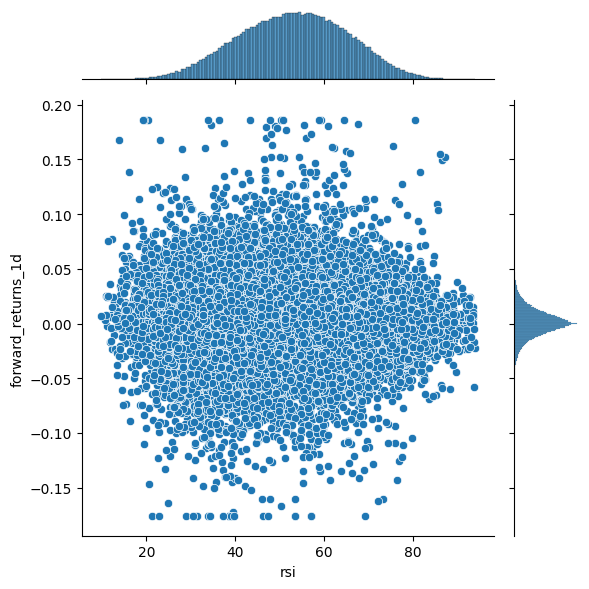



Information Coefficient Between rsi and forward_returns_7d: -0.008586110127584647 |Probability:0.00015664315585573352




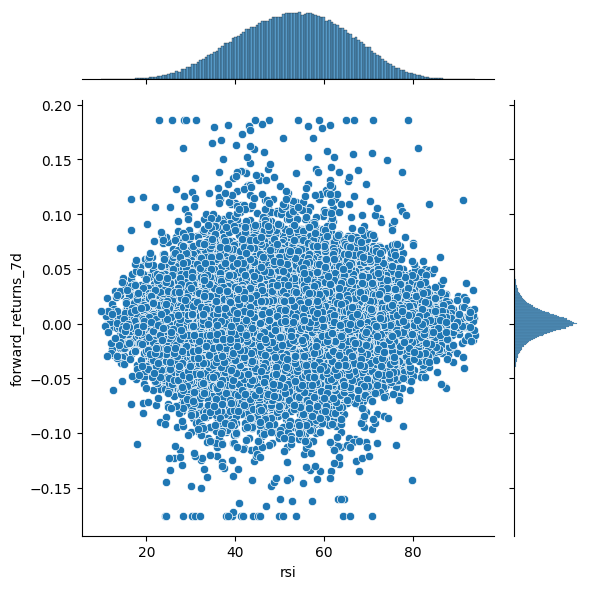



Information Coefficient Between rsi and forward_returns_15d: -0.0033963431623403534 |Probability:0.134831113887563




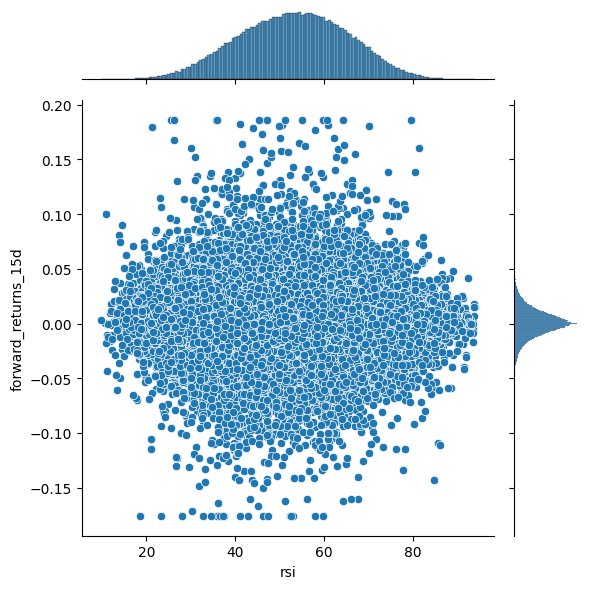



Information Coefficient Between rsi and forward_returns_21d: -0.004589670846803999 |Probability:0.04330932288719596




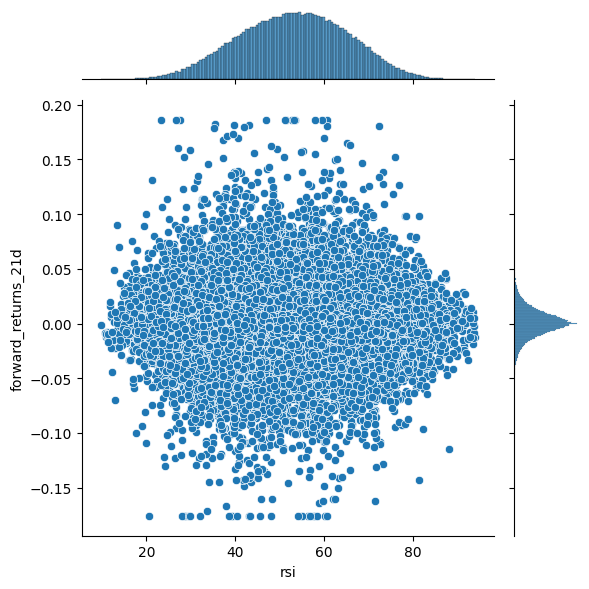

In [32]:
relation_between_feature_and_target("rsi")

### BB Low



Information Coefficient Between bb_lower and forward_returns_1d: -0.017629338140009054 |Probability:8.339726932976526e-15




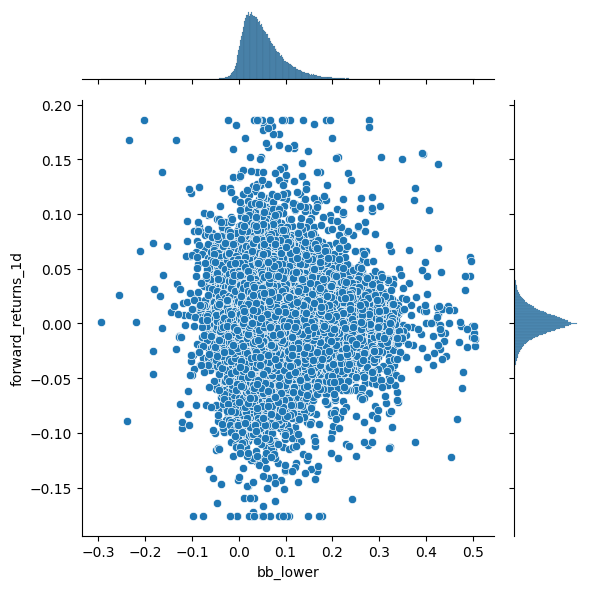



Information Coefficient Between bb_lower and forward_returns_7d: -0.0069849717151567485 |Probability:0.0021027293141648107




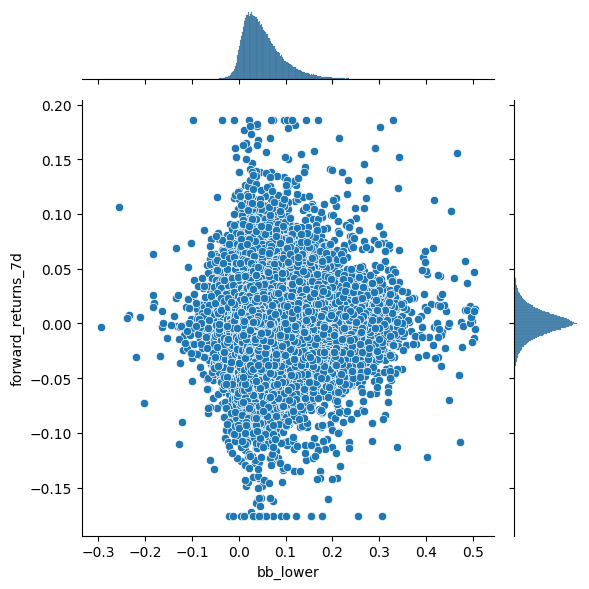



Information Coefficient Between bb_lower and forward_returns_15d: -0.006163397229915727 |Probability:0.006655698752986371




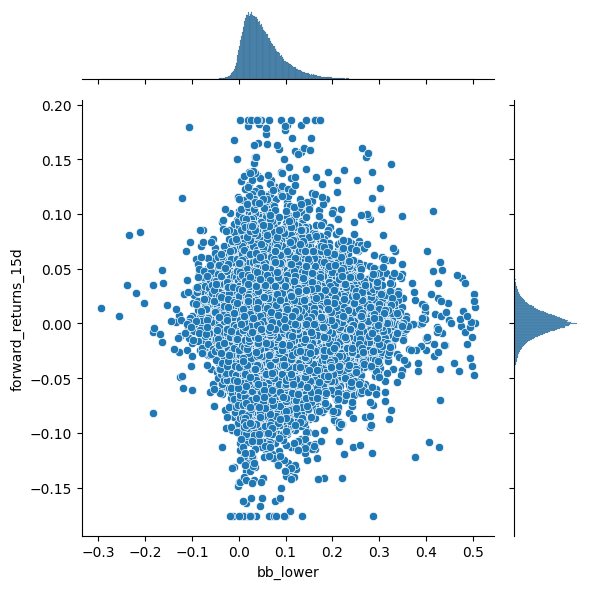



Information Coefficient Between bb_lower and forward_returns_21d: -0.0020144484238383896 |Probability:0.37512935639322886




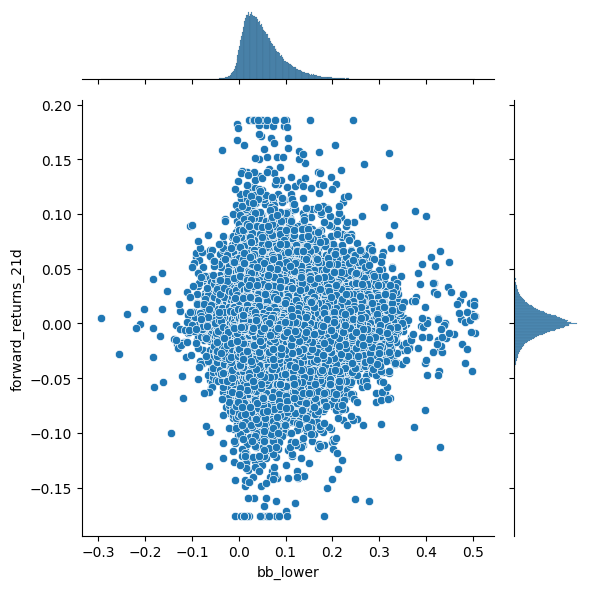

In [33]:
relation_between_feature_and_target("bb_lower")

### BB Upper



Information Coefficient Between bb_upper and forward_returns_1d: 0.027129664282118507 |Probability:6.760979314730957e-33




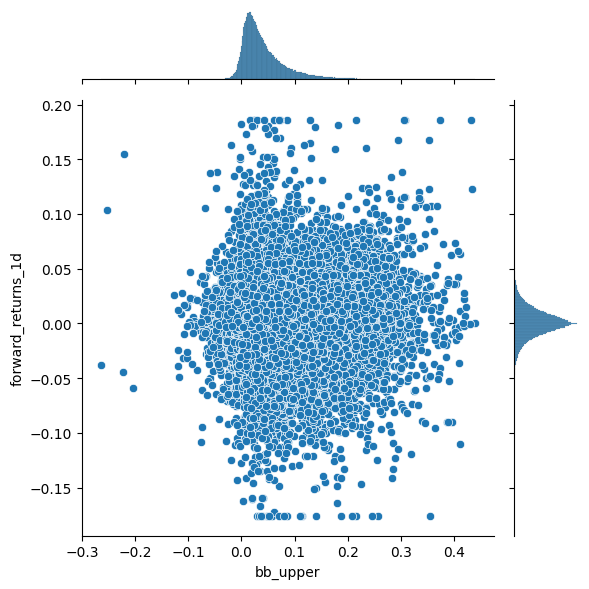



Information Coefficient Between bb_upper and forward_returns_7d: 0.008827427571995488 |Probability:0.00010168084629400131




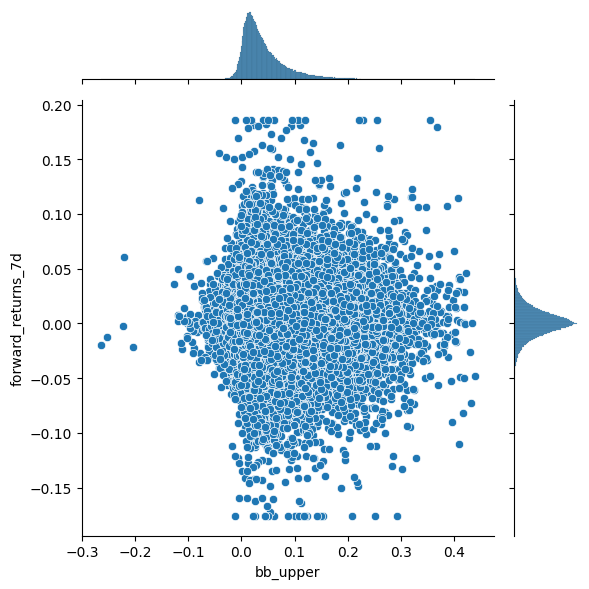



Information Coefficient Between bb_upper and forward_returns_15d: 0.002122870605713201 |Probability:0.34997298147552525




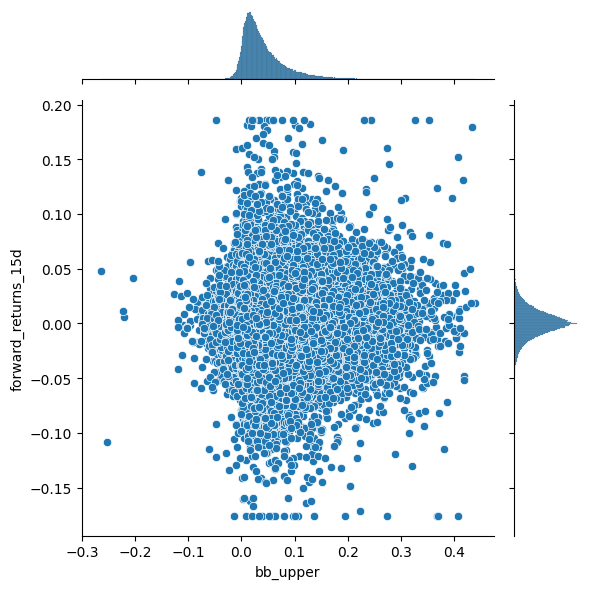



Information Coefficient Between bb_upper and forward_returns_21d: 0.006252154728770845 |Probability:0.005911035770628166




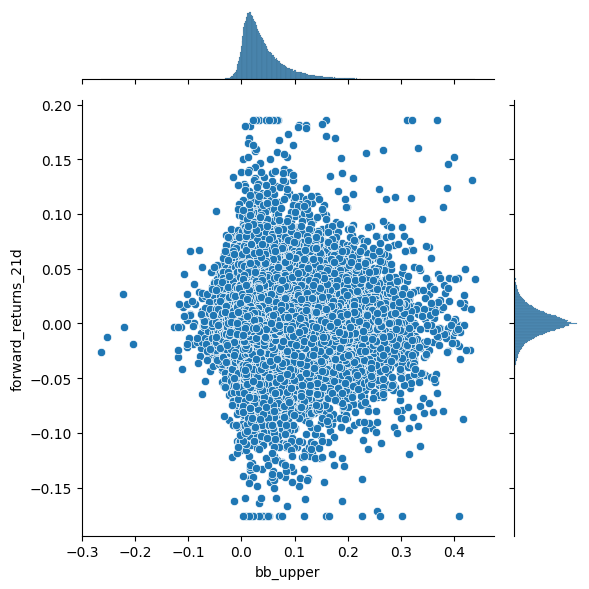

In [34]:
relation_between_feature_and_target("bb_upper")

### Average True Range



Information Coefficient Between avg_true_range and forward_returns_1d: 0.00039069620944104556 |Probability:0.8634275938923499




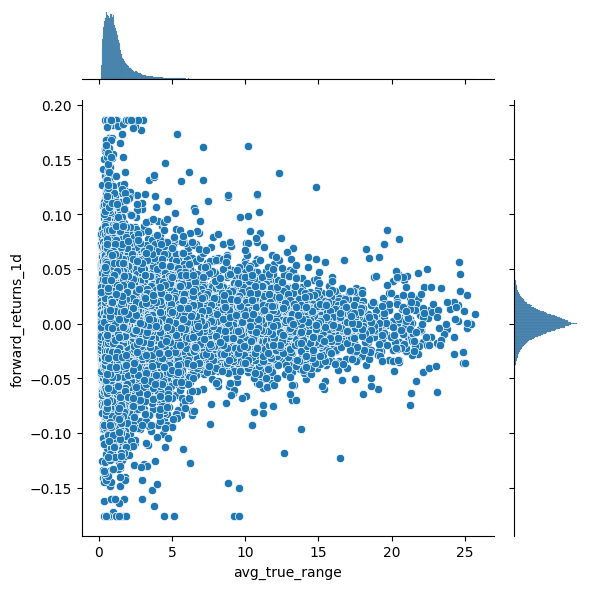



Information Coefficient Between avg_true_range and forward_returns_7d: -0.0020219501377879054 |Probability:0.3733536232918869




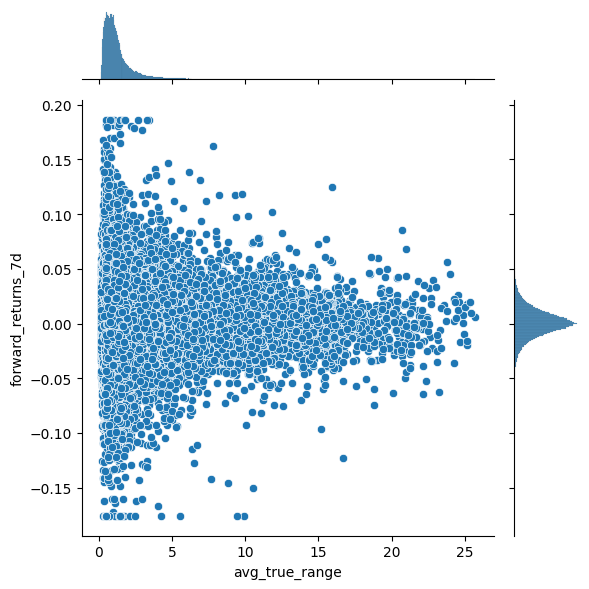



Information Coefficient Between avg_true_range and forward_returns_15d: -0.0010888219392497407 |Probability:0.631669715503487




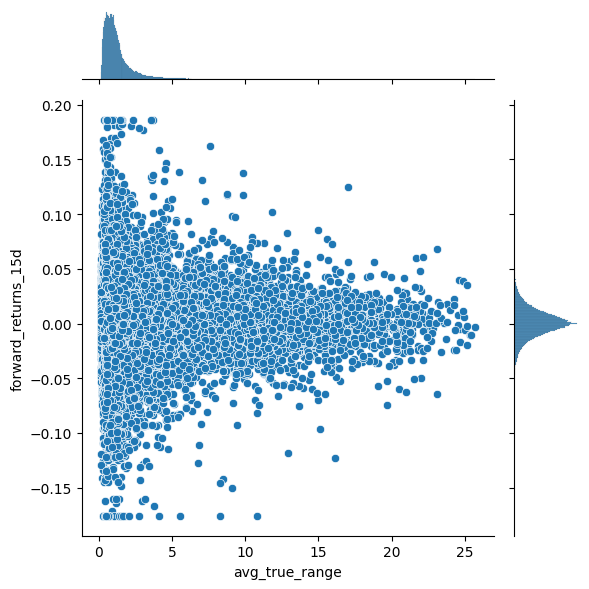



Information Coefficient Between avg_true_range and forward_returns_21d: -1.76017499554905e-05 |Probability:0.9938168084288395




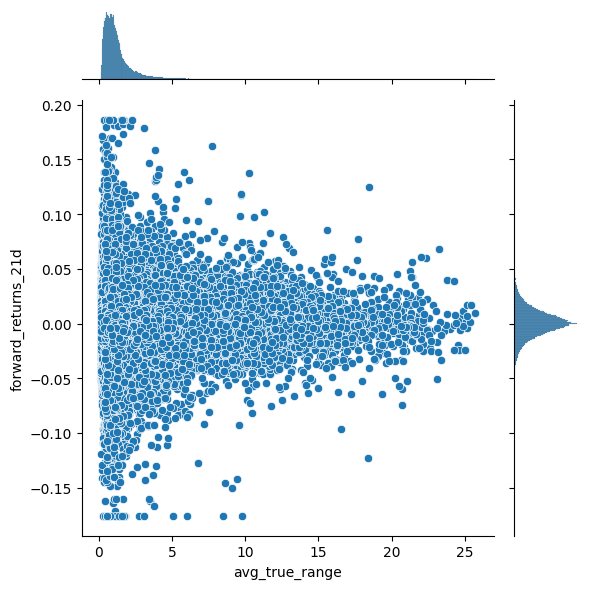

In [35]:
relation_between_feature_and_target("avg_true_range")

### MACD



Information Coefficient Between macd and forward_returns_1d: -0.020140696905988117 |Probability:7.428043376912046e-19




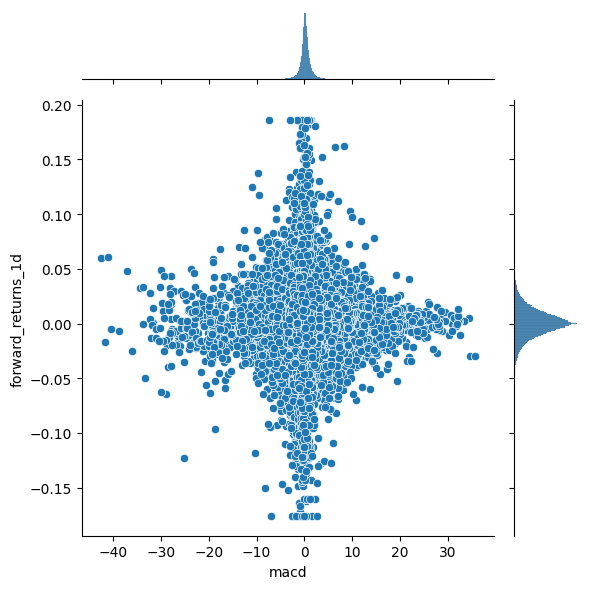



Information Coefficient Between macd and forward_returns_7d: -0.012505932124972755 |Probability:3.6660370169904715e-08




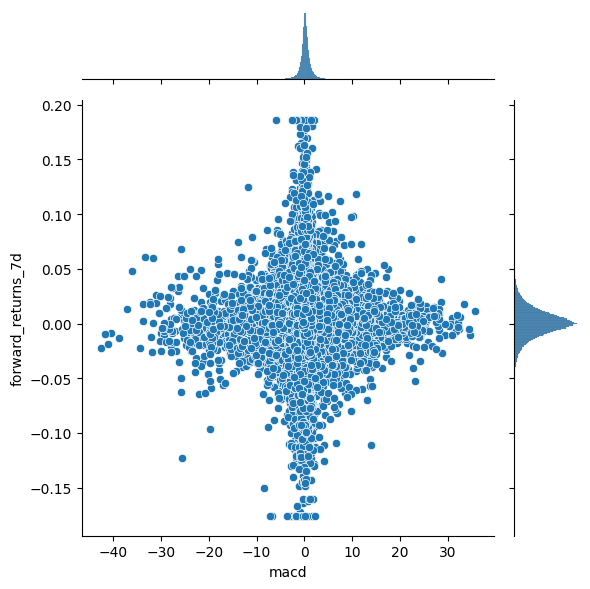



Information Coefficient Between macd and forward_returns_15d: -0.002261416313951329 |Probability:0.31942522558435976




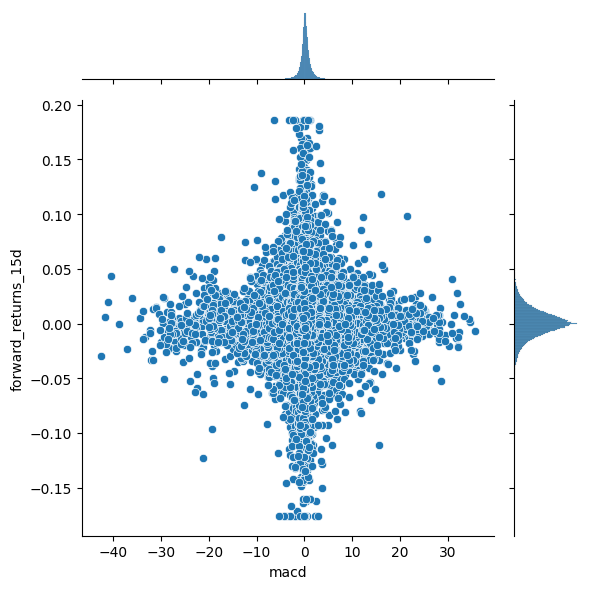



Information Coefficient Between macd and forward_returns_21d: -0.0032194423139560295 |Probability:0.15635601351056985




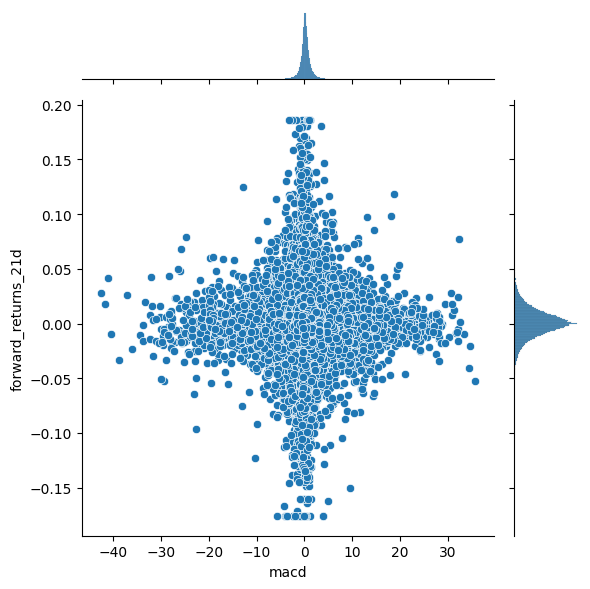

In [36]:
relation_between_feature_and_target("macd")